Image shape:  (960, 1280, 3)
Image shape:  (960, 1280, 3)
Image shape:  (960, 1280, 3)
Image shape:  (960, 1280, 3)


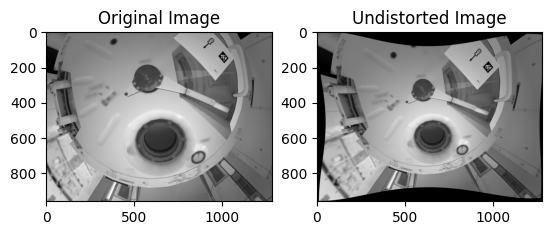

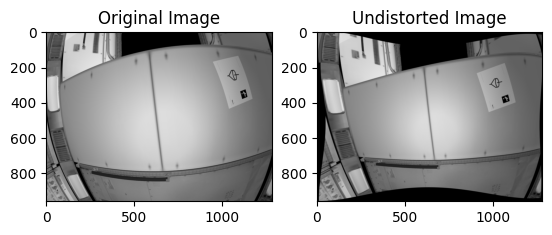

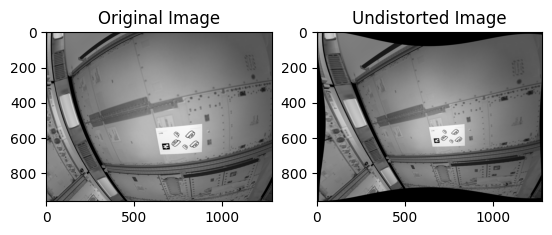

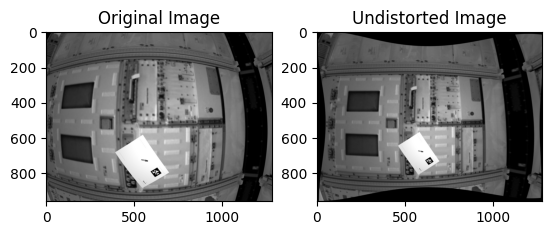

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

camera_matrix = np.array(
    [
        [661.783002, 0.000000, 595.212041],
        [0.000000, 671.508662, 489.094196],
        [0.000000, 0.000000, 1.000000],
    ]
)
dist_coeffs = np.array([-0.215168, 0.044354, 0.003615, 0.005093, 0.000000])


def undistort_image(image, camera_matrix, dist_coeffs):
    h, w = image.shape[:2]
    print("Image shape: ", image.shape)
    new_camera_matrix, roi = cv2.getOptimalNewCameraMatrix(
        camera_matrix, dist_coeffs, (w, h), 1, (w, h)
    )
    undistorted_image = cv2.undistort(
        image, camera_matrix, dist_coeffs, None, new_camera_matrix
    )
    return undistorted_image


dir = os.getcwd()
images = [f for f in os.listdir(dir) if f.endswith(".png")]
undistort_images = []
for image in images:
    img = cv2.imread(image)
    undistort_images.append(undistort_image(img, camera_matrix, dist_coeffs))


for i in range(len(images)):
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(cv2.imread(images[i]), cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(undistort_images[i], cv2.COLOR_BGR2RGB))
    plt.title("Undistorted Image")
    plt.show()
    cv2.imwrite("undistorted_" + images[i], undistort_images[i])

In [6]:
import numpy as np


def quaternion_rotation_matrix(Q):
    """
    Covert a quaternion into a full three-dimensional rotation matrix.

    Input
    :param Q: A 4 element array representing the quaternion (q0,q1,q2,q3)

    Output
    :return: A 3x3 element matrix representing the full 3D rotation matrix.
             This rotation matrix converts a point in the local reference
             frame to a point in the global reference frame.
    """
    # Extract the values from Q
    q0 = Q[0]
    q1 = Q[1]
    q2 = Q[2]
    q3 = Q[3]

    # First row of the rotation matrix
    r00 = 2 * (q0 * q0 + q1 * q1) - 1
    r01 = 2 * (q1 * q2 - q0 * q3)
    r02 = 2 * (q1 * q3 + q0 * q2)

    # Second row of the rotation matrix
    r10 = 2 * (q1 * q2 + q0 * q3)
    r11 = 2 * (q0 * q0 + q2 * q2) - 1
    r12 = 2 * (q2 * q3 - q0 * q1)

    # Third row of the rotation matrix
    r20 = 2 * (q1 * q3 - q0 * q2)
    r21 = 2 * (q2 * q3 + q0 * q1)
    r22 = 2 * (q0 * q0 + q3 * q3) - 1

    # 3x3 rotation matrix
    rot_matrix = np.array([[r00, r01, r02], [r10, r11, r12], [r20, r21, r22]])

    return rot_matrix

[visualization](https://quaternions.online/)

In [7]:
unit_vector = np.array([1, 0, 0])
# (w, x, y, z)

# no rotation
Q = np.array([1, 0, 0, 0])
R = quaternion_rotation_matrix(Q)
print(f"Rotation matrix for no rotation:\n{R}")
print(f"Unit vector after no rotation: {np.dot(R, unit_vector)}\n")

# rotation of 90 degrees around the x-axis
Q = np.array([np.cos(np.pi/4), np.sin(np.pi/4), 0, 0])
R = quaternion_rotation_matrix(Q)
print(f"Rotation matrix for 90 degrees around x-axis:\n{R}")
print(f"Unit vector after 90 degrees around x-axis: {np.dot(R, unit_vector)}\n")

# rotation of 90 degrees around the y-axis
Q = np.array([np.cos(np.pi/4), 0, np.sin(np.pi/4), 0])
R = quaternion_rotation_matrix(Q)
print(f"Rotation matrix for 90 degrees around y-axis:\n{R}")
print(f"Unit vector after 90 degrees around y-axis: {np.dot(R, unit_vector)}\n")

# rotation of 90 degrees around both x and y axes
Q = np.array([0.5, 0.5, 0.5, 0.5])
R = quaternion_rotation_matrix(Q)
print(f"Rotation matrix for 90 degrees around both x and y axes:\n{R}")
print(f"Unit vector after 90 degrees around both x and y axes: {np.dot(R, unit_vector)}\n")

Rotation matrix for no rotation:
[[1 0 0]
 [0 1 0]
 [0 0 1]]
Unit vector after no rotation: [1 0 0]

Rotation matrix for 90 degrees around x-axis:
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  2.22044605e-16 -1.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  2.22044605e-16]]
Unit vector after 90 degrees around x-axis: [1. 0. 0.]

Rotation matrix for 90 degrees around y-axis:
[[ 2.22044605e-16  0.00000000e+00  1.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [-1.00000000e+00  0.00000000e+00  2.22044605e-16]]
Unit vector after 90 degrees around y-axis: [ 2.22044605e-16  0.00000000e+00 -1.00000000e+00]

Rotation matrix for 90 degrees around both x and y axes:
[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]
Unit vector after 90 degrees around both x and y axes: [0. 1. 0.]



# camera to world

In [8]:
# camera centered at (1, 0, 0) (world coordinates)
center = np.array([1, 0, 0])

# no rotation (world coordinates)
Q = np.array([1, 0, 0, 0])
R = quaternion_rotation_matrix(Q)
# camera to world transformation matrix
transformation_matrix = np.row_stack((np.column_stack((R, center)), [0, 0, 0, 1]))
print(f"camera to world transformation matrix for no rotation:\n{transformation_matrix}")
# (camera coordinates)
point = np.concatenate((unit_vector, [1]))
print(f"Unit vector after no rotation and offset: {np.dot(transformation_matrix, point)[:3]}\n")

# rotation of 90 degrees around the x-axis
Q = np.array([np.cos(np.pi / 4), np.sin(np.pi / 4), 0, 0])
R = quaternion_rotation_matrix(Q)
transformation_matrix = np.row_stack((np.column_stack((R, center)), [0, 0, 0, 1]))
print(f"camera to world transformation matrix for 90 degrees around x-axis:\n{transformation_matrix}")
point = np.concatenate((unit_vector, [1]))
print(
    f"Unit vector after 90 degrees around x-axis and offset: {np.dot(transformation_matrix, point)[:3]}\n"
)

# rotation of 90 degrees around the y-axis
Q = np.array([np.cos(np.pi / 4), 0, np.sin(np.pi / 4), 0])
R = quaternion_rotation_matrix(Q)
transformation_matrix = np.row_stack((np.column_stack((R, center)), [0, 0, 0, 1]))
print(f"camera to world transformation matrix for 90 degrees around y-axis:\n{transformation_matrix}")
point = np.concatenate((unit_vector, [1]))
print(
    f"Unit vector after 90 degrees around y-axis and offset: {np.dot(transformation_matrix, point)[:3]}\n"
)

# rotation of 90 degrees around both x and y axes
Q = np.array([0.5, 0.5, 0.5, 0.5])
R = quaternion_rotation_matrix(Q)
transformation_matrix = np.row_stack((np.column_stack((R, center)), [0, 0, 0, 1]))
print(
    f"camera to world transformation matrix for 90 degrees around both x and y axes:\n{transformation_matrix}"
)
point = np.concatenate((unit_vector, [1]))
print(
    f"Unit vector after 90 degrees around both x and y axes and offset: {np.dot(transformation_matrix, point)[:3]}\n"
)

camera to world transformation matrix for no rotation:
[[1 0 0 1]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]
Unit vector after no rotation and offset: [2 0 0]

camera to world transformation matrix for 90 degrees around x-axis:
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]
 [ 0.00000000e+00  2.22044605e-16 -1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  2.22044605e-16  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Unit vector after 90 degrees around x-axis and offset: [2. 0. 0.]

camera to world transformation matrix for 90 degrees around y-axis:
[[ 2.22044605e-16  0.00000000e+00  1.00000000e+00  1.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.00000000e+00  0.00000000e+00  2.22044605e-16  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Unit vector after 90 degrees around y-axis and offset: [ 1.  0. -1.]

camera to world transformation matrix 

In [9]:
def camera_to_world(pos, quaternion, point):
    R = quaternion_rotation_matrix(quaternion)
    Rt01 = np.row_stack((np.column_stack((R, pos)), [0, 0, 0, 1]))
    return np.dot(Rt01, point)[:3]


# camera centered at (1, 0, 0) (world coordinates)
center = np.array([10, 50, 3])
# no rotation
Q = np.array([0.5, 0.5, 0.5, 0.5]) # (world coordinates)
# camera coordinates
point = np.concatenate(([1, 50, 0], [1]))
print(f"{camera_to_world(center, Q, point)}")

[10. 51. 53.]


## problem
- orientation, center is given from api
- snapshot point need to subtract with some offset
- save the snapshot point and orientation to map

In [10]:
center = np.array([10, 50, 3])
Q = np.array([0.5, 0.5, 0.5, 0.5])

where_the_item_is = np.array([1, 50, 0])
snap_shot_distance = 0.5
snap_shot_point = where_the_item_is - snap_shot_distance * np.array([1, 0, 0])

point = np.concatenate((snap_shot_point, [1]))
print(f"{camera_to_world(center, Q, point)}")
# api.moveto(camera_to_world(center, Q, point))

[10.  50.5 53. ]
